# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 643


Timestamp('1970-01-01 00:00:01.670184752')

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}"# YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"   # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() # YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]# YOUR CODE HERE
        city_lng = city_weather["coord"]["lon"] # YOUR CODE HERE
        city_max_temp = city_weather["main"]["temp_max"] # YOUR CODE HERE
        city_humidity = city_weather["main"]["humidity"] # YOUR CODE HERE
        city_clouds = city_weather["clouds"]["all"] # YOUR CODE HERE
        city_wind = city_weather["wind"]["speed"] # YOUR CODE HERE
        city_country = city_weather["sys"]["country"] # YOUR CODE HERE
        city_date = city_weather["dt"] # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | isangel
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | ranfurly
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | kushmurun
Processing Record 9 of Set 1 | anadyr
Processing Record 10 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 11 of Set 1 | masvingo
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | sawakin
Processing Record 15 of Set 1 | srednekolymsk
Processing Record 16 of Set 1 | kasongo-lunda
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | leningradskiy
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | cockburn town
Processing Record 22 of Set 1 | tshikapa
Pro

Processing Record 36 of Set 4 | hobyo
Processing Record 37 of Set 4 | lushoto
Processing Record 38 of Set 4 | nabire
Processing Record 39 of Set 4 | kindu
Processing Record 40 of Set 4 | saint-joseph
Processing Record 41 of Set 4 | yellowknife
Processing Record 42 of Set 4 | pacific grove
Processing Record 43 of Set 4 | baker city
Processing Record 44 of Set 4 | nishihara
Processing Record 45 of Set 4 | hofn
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | kitale
Processing Record 48 of Set 4 | mahanoro
Processing Record 49 of Set 4 | kano
Processing Record 0 of Set 5 | fuerte olimpo
Processing Record 1 of Set 5 | vrangel
Processing Record 2 of Set 5 | goma
Processing Record 3 of Set 5 | jibuti
Processing Record 4 of Set 5 | martapura
Processing Record 5 of Set 5 | hasaki
Processing Record 6 of Set 5 | dafeng
Processing Record 7 of Set 5 | ilulissat
Processing Record 8 of Set 5 | batemans bay
Processing Record 9 of Set 5 | sao domingos
Processing Record 10 of Set 

Processing Record 28 of Set 8 | toora-khem
Processing Record 29 of Set 8 | sambava
Processing Record 30 of Set 8 | havelock
Processing Record 31 of Set 8 | bodden town
Processing Record 32 of Set 8 | svetlyy
Processing Record 33 of Set 8 | mocuba
Processing Record 34 of Set 8 | hihifo
City not found. Skipping...
Processing Record 35 of Set 8 | rochester
Processing Record 36 of Set 8 | laureles
Processing Record 37 of Set 8 | liverpool
Processing Record 38 of Set 8 | paso de los toros
Processing Record 39 of Set 8 | sibolga
Processing Record 40 of Set 8 | kutum
Processing Record 41 of Set 8 | rach gia
Processing Record 42 of Set 8 | port hardy
Processing Record 43 of Set 8 | eureka
Processing Record 44 of Set 8 | boden
Processing Record 45 of Set 8 | anayennisis
City not found. Skipping...
Processing Record 46 of Set 8 | davidson
Processing Record 47 of Set 8 | kotma
Processing Record 48 of Set 8 | kargasok
Processing Record 49 of Set 8 | inderborskiy
City not found. Skipping...
Process

City not found. Skipping...
Processing Record 18 of Set 12 | mujiayingzi
Processing Record 19 of Set 12 | taltal
Processing Record 20 of Set 12 | port-cartier
Processing Record 21 of Set 12 | lolua
City not found. Skipping...
Processing Record 22 of Set 12 | nyurba
Processing Record 23 of Set 12 | berlevag
Processing Record 24 of Set 12 | chandbali
Processing Record 25 of Set 12 | doctor arroyo
Processing Record 26 of Set 12 | qeshm
Processing Record 27 of Set 12 | sorvag
City not found. Skipping...
Processing Record 28 of Set 12 | denpasar
Processing Record 29 of Set 12 | khandyga
Processing Record 30 of Set 12 | weiser
Processing Record 31 of Set 12 | iranshahr
Processing Record 32 of Set 12 | velikiy ustyug
Processing Record 33 of Set 12 | angren
Processing Record 34 of Set 12 | grand-lahou
Processing Record 35 of Set 12 | barra do corda
Processing Record 36 of Set 12 | klaksvik
Processing Record 37 of Set 12 | wattegama
Processing Record 38 of Set 12 | urucui
Processing Record 39 o

In [6]:
city_data

[{'City': 'isangel',
  'Lat': -19.55,
  'Lng': 169.2667,
  'Max Temp': 27.46,
  'Humidity': 78,
  'Cloudiness': 100,
  'Wind Speed': 2.05,
  'Country': 'VU',
  'Date': 1670184178},
 {'City': 'dikson',
  'Lat': 73.5069,
  'Lng': 80.5464,
  'Max Temp': -0.68,
  'Humidity': 92,
  'Cloudiness': 100,
  'Wind Speed': 9.88,
  'Country': 'RU',
  'Date': 1670184149},
 {'City': 'ranfurly',
  'Lat': -45.1333,
  'Lng': 170.1,
  'Max Temp': 12.31,
  'Humidity': 73,
  'Cloudiness': 49,
  'Wind Speed': 0.19,
  'Country': 'NZ',
  'Date': 1670184537},
 {'City': 'rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 23.65,
  'Humidity': 83,
  'Cloudiness': 60,
  'Wind Speed': 6.71,
  'Country': 'PF',
  'Date': 1670184153},
 {'City': 'saskylakh',
  'Lat': 71.9167,
  'Lng': 114.0833,
  'Max Temp': -24.27,
  'Humidity': 96,
  'Cloudiness': 100,
  'Wind Speed': 8.54,
  'Country': 'RU',
  'Date': 1670184218},
 {'City': 'hilo',
  'Lat': 19.7297,
  'Lng': -155.09,
  'Max Temp': 25.71,
  'Humidity': 94

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isangel,-19.5500,169.2667,27.46,78,100,2.05,VU,1670184178
1,dikson,73.5069,80.5464,-0.68,92,100,9.88,RU,1670184149
2,ranfurly,-45.1333,170.1000,12.31,73,49,0.19,NZ,1670184537
3,rikitea,-23.1203,-134.9692,23.65,83,60,6.71,PF,1670184153
4,saskylakh,71.9167,114.0833,-24.27,96,100,8.54,RU,1670184218


In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isangel,-19.5500,169.2667,27.46,78,100,2.05,VU,1670184178
1,dikson,73.5069,80.5464,-0.68,92,100,9.88,RU,1670184149
2,ranfurly,-45.1333,170.1000,12.31,73,49,0.19,NZ,1670184537
3,rikitea,-23.1203,-134.9692,23.65,83,60,6.71,PF,1670184153
4,saskylakh,71.9167,114.0833,-24.27,96,100,8.54,RU,1670184218


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isangel,-19.5500,169.2667,27.46,78,100,2.05,VU,1670184178
1,dikson,73.5069,80.5464,-0.68,92,100,9.88,RU,1670184149
2,ranfurly,-45.1333,170.1000,12.31,73,49,0.19,NZ,1670184537
3,rikitea,-23.1203,-134.9692,23.65,83,60,6.71,PF,1670184153
4,saskylakh,71.9167,114.0833,-24.27,96,100,8.54,RU,1670184218


In [11]:
city_data_df["Lat"]

City_ID
0     -19.5500
1      73.5069
2     -45.1333
3     -23.1203
4      71.9167
        ...   
589    58.9564
590    56.7690
591    60.3964
592    37.0881
593    22.6906
Name: Lat, Length: 594, dtype: float64

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

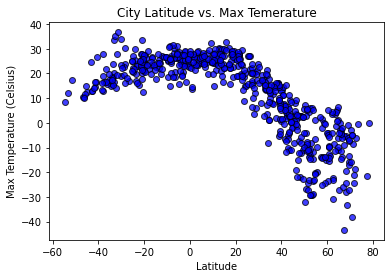

In [12]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
y_max_temp = city_data_df["Max Temp"]
x_latitude = city_data_df["Lat"]
plt.scatter(x_latitude, y_max_temp, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temerature")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

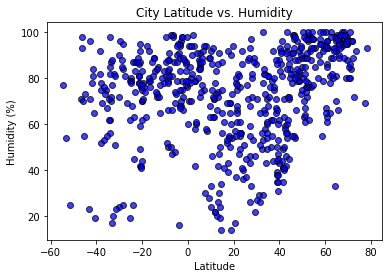

In [13]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
y_humidity = city_data_df["Humidity"]
x_latitude = city_data_df["Lat"]
plt.scatter(x_latitude, y_humidity, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

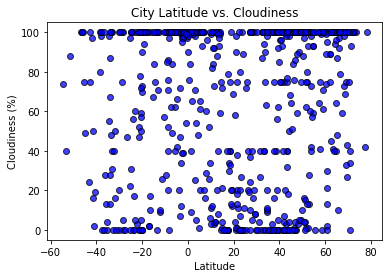

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
y_cloudiness = city_data_df["Cloudiness"]
x_latitude = city_data_df["Lat"]
plt.scatter(x_latitude, y_cloudiness, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

In [15]:
city_data_df["Wind Speed"]


City_ID
0      2.05
1      9.88
2      0.19
3      6.71
4      8.54
       ... 
589    7.09
590    5.76
591    2.96
592    2.31
593    0.71
Name: Wind Speed, Length: 594, dtype: float64

#### Latitude vs. Wind Speed Plot

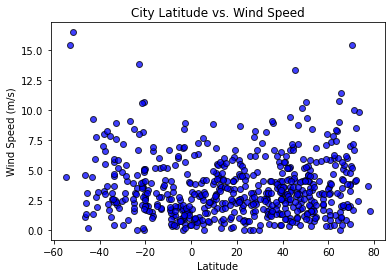

In [16]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
y_wind = city_data_df["Wind Speed"]
x_latitude = city_data_df["Lat"]
plt.scatter(x_latitude, y_wind, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [38]:
# Create a DataFrame with the Northern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']>= 0,:])
# Display sample data
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dikson,73.5069,80.5464,-0.68,92,100,9.88,RU,1670184149
4,saskylakh,71.9167,114.0833,-24.27,96,100,8.54,RU,1670184218
5,hilo,19.7297,-155.0900,25.71,94,69,2.24,US,1670184194
6,albany,42.6001,-73.9662,2.87,59,100,2.32,US,1670184027
7,kushmurun,52.4503,64.6311,-12.96,96,100,2.47,KZ,1670184538
...,...,...,...,...,...,...,...,...,...
589,tommot,58.9564,126.2925,-13.71,92,100,7.09,RU,1670184741
590,arden,56.7690,9.8618,2.53,80,100,5.76,DK,1670184751
591,brae,60.3964,-1.3530,5.27,65,89,2.96,GB,1670184751


In [39]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat']< 0,:])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,isangel,-19.5500,169.2667,27.46,78,100,2.05,VU,1670184178
2,ranfurly,-45.1333,170.1000,12.31,73,49,0.19,NZ,1670184537
3,rikitea,-23.1203,-134.9692,23.65,83,60,6.71,PF,1670184153
9,masvingo,-20.0637,30.8277,24.51,44,0,2.99,ZW,1670184539
10,cape town,-33.9258,18.4232,17.93,62,67,4.47,ZA,1670184046


###  Temperature vs. Latitude Linear Regression Plot

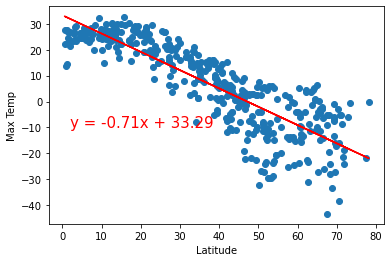

In [52]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

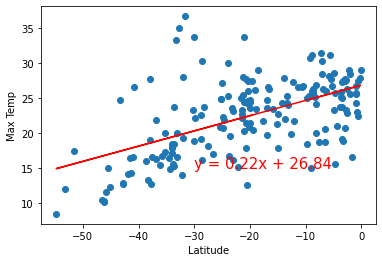

In [55]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

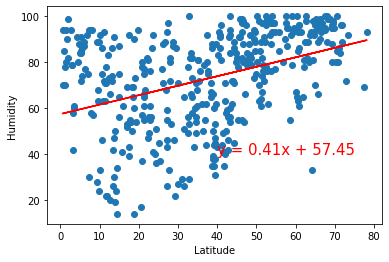

In [56]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

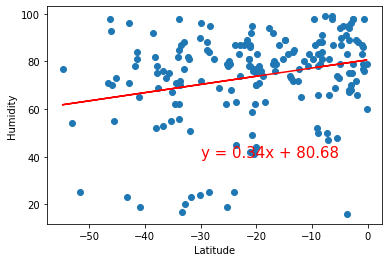

In [58]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

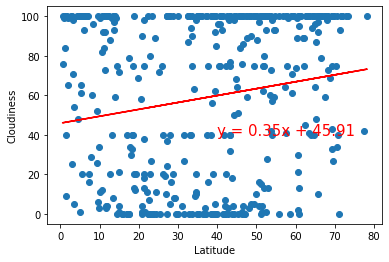

In [59]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

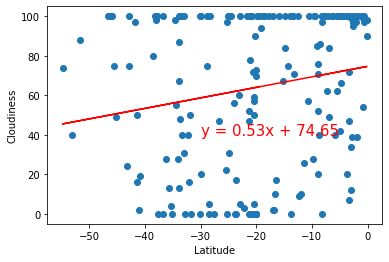

In [60]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

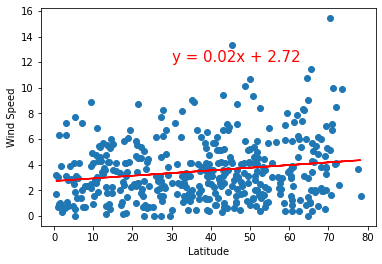

In [62]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

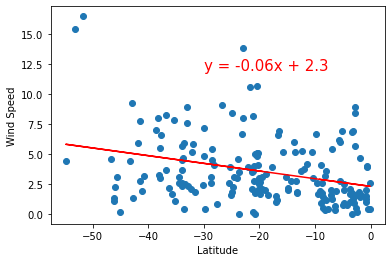

In [63]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()